In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,NaN,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


### Question 1

Check Below
- DataFrame Shape
- Data Types
- Duplicate records (remove if found)
- Missing/Null Values (replace with median value)

In [5]:
# DataFrame shape
print("Shape of DataFrame:", df.shape)

# Data types
print("\nData Types:\n", df.dtypes)

# Removing duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Replacing missing/null values with median
df = df.fillna(df.median(numeric_only=True))

Shape of DataFrame: (3000, 25)

Data Types:
 ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

Shape after removing duplicates: (3000, 25)


### Question 2:

How does time spent on social media compare to time spent on education among teens?

- Plot side-by-side histograms of Time on Social Media and Time on Education
- Find and compare the median time for both.
- Write simple comments to explain what the data shows

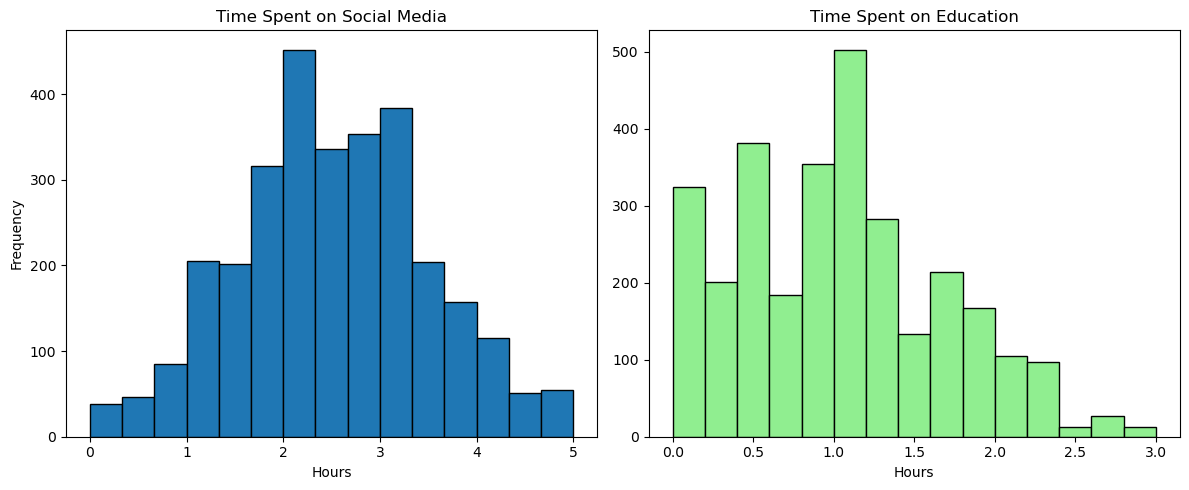

Median Time_on_Social_Media: 2.50 hours
Median Time_on_Education: 1.00 hours


In [9]:
# --- setup: edit only these two names -----------
SOCIAL_COL = 'Time_on_Social_Media'  # exact column name in your file
EDU_COL    = 'Time_on_Education'     # exact column name in your file
# -----------------------------------------------

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df[SOCIAL_COL], bins=15, edgecolor='black')
plt.title('Time Spent on Social Media')
plt.xlabel('Hours'); plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df[EDU_COL], bins=15, edgecolor='black', color='lightgreen')
plt.title('Time Spent on Education')
plt.xlabel('Hours')

plt.tight_layout(); plt.show()

print(f"Median {SOCIAL_COL}: {df[SOCIAL_COL].median():.2f} hours")
print(f"Median {EDU_COL}: {df[EDU_COL].median():.2f} hours")

### Question 3

- How can we detect and identify outliers in Daily Usage Hours, Exercise Hours, and Screen Time Before Bed among teens using the IQR method?
- Display the records corresponding to these outliers using boxplot.



['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']


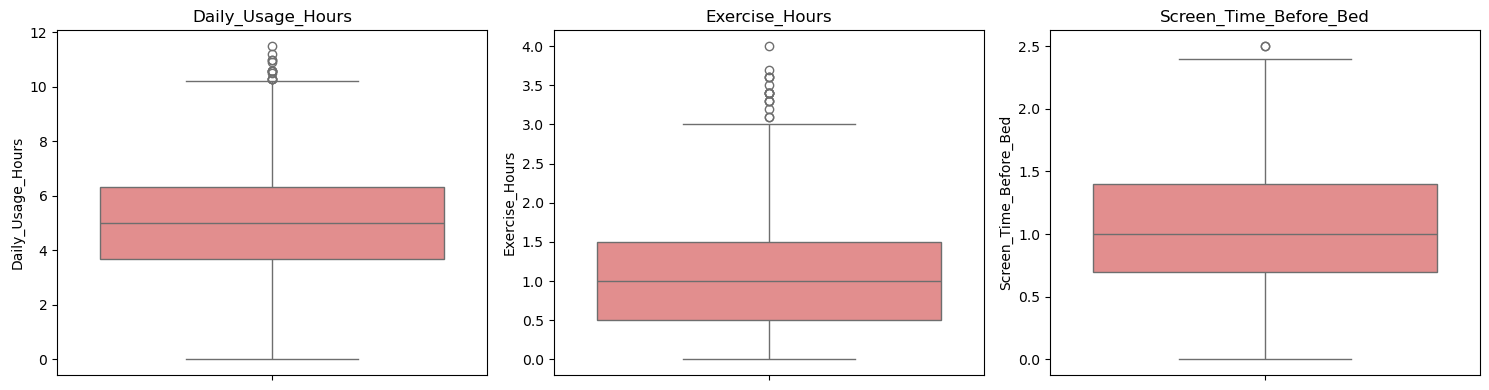

In [14]:
print(df.columns.tolist())

cols = ['Daily_Usage_', 'Exercise_H', 'Screen_Time_']

cols = ['Daily_Usage_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed']

plt.figure(figsize=(15,4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)

plt.tight_layout()
plt.show()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

### Question 4

Analyze the correlation heatmap showing relationships between teen behaviors, screen usage, and mental health indicators.

Focus your attention on the following numeric variables:

- Daily_Usage_Hours, Sleep_Hours, Academic_Performance, Addiction_Level, Time_on_Social_Media,

- Time_on_Gaming, Time_on_Education, Apps_Used_Daily, Anxiety_Level, Depression_Level,

- Self_Esteem, Social_Interactions, Exercise_Hours, Screen_Time_Before_Bed,

- Phone_Checks_Per_Day, Family_Communication, Weekend_Usage_Hours


Identify two strong positive and two strong negative correlation involving any of the above variables.

Explain briefly what these correlations might suggest about teen behavior, wellbeing, or digital habits.

Use specific values from the heatmap to support your observation.



In [18]:
print(df.columns.tolist())
print("Columns in the DataFrame:")
for col in df.columns:
    print(f"- '{col}'")


# Corrected correlation columns (based on your screenshot)
corr_cols = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level',
    'Time_on_Social', 'Time_on_Gami', 'Time_on_Educa', 'Apps_Used_Da',
    'Anxiety_Leve', 'Depression_L', 'Self_Est', 'Social_Interacti',
    'Exercise_Hours', 'Screen_Time_Before_Bed', 'Phone_Checks_',
    'Family_Communi', 'Weekend_Usag'
]

# Correlation matrix
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Top correlations
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove perfect self-correlations

print("\nTop 2 Strong Positive Correlations:")
print(corr_pairs.head(2))

print("\nTop 2 Strong Negative Correlations:")
print(corr_pairs.tail(2))

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

['id', 'name', 'age', 'gender', 'location', 'school_grade', 'daily_usage_hours', 'sleep_hours', 'academic_performance', 'social_interactions', 'exercise_hours', 'anxiety_level', 'depression_level', 'self_esteem', 'parental_control', 'screen_time_before_bed', 'phone_checks_per_day', 'apps_used_daily', 'time_on_social_media', 'time_on_gaming', 'time_on_education', 'phone_usage_purpose', 'family_communication', 'weekend_usage_hours', 'addiction_level']
Columns in the DataFrame:
- 'id'
- 'name'
- 'age'
- 'gender'
- 'location'
- 'school_grade'
- 'daily_usage_hours'
- 'sleep_hours'
- 'academic_performance'
- 'social_interactions'
- 'exercise_hours'
- 'anxiety_level'
- 'depression_level'
- 'self_esteem'
- 'parental_control'
- 'screen_time_before_bed'
- 'phone_checks_per_day'
- 'apps_used_daily'
- 'time_on_social_media'
- 'time_on_gaming'
- 'time_on_education'
- 'phone_usage_purpose'
- 'family_communication'
- 'weekend_usage_hours'
- 'addiction_level'


KeyError: "None of [Index(['Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',\n       'Addiction_Level', 'Time_on_Social', 'Time_on_Gami', 'Time_on_Educa',\n       'Apps_Used_Da', 'Anxiety_Leve', 'Depression_L', 'Self_Est',\n       'Social_Interacti', 'Exercise_Hours', 'Screen_Time_Before_Bed',\n       'Phone_Checks_', 'Family_Communi', 'Weekend_Usag'],\n      dtype='object')] are in the [columns]"

### Question 5

How does the average addiction level vary across different age groups? Show with line graph

In [20]:
age_addiction = df.groupby('age(in_years)')['addiction_level'].mean()

plt.figure(figsize=(10,5))
age_addiction.plot(marker='o', color='purple')
plt.title('Average Addiction Level by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.show()

KeyError: 'age(in_years)'